<a href="https://colab.research.google.com/github/mburu-mwangi/Moringa-Machine-Learning-Wk-1/blob/main/Moringa_Data_Science_Core_W6_Independent_Project_2021_10_Alfonce_Mwangi_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 

## 1. Defining the Question

### a) Specifying the Question

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

**Approach 1: Polynomial approach**

What to train given:

Rank of home team
Rank of away team
Tournament type
*Model 1: Predict how many goals the home team scores.*

*Model 2: Predict how many goals the away team scores.*

**Approach 2: Logistic approach**

*Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)*

### b) Defining the Metric for Success
1.   Perform your EDA
2.   Perform any necessary feature engineering 
3.   Check of multicollinearity
4.   Start building the model
5.   Cross-validate the model
6.   Compute RMSE
7.   Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test.



### c) Understanding the context 
**According to wikipedia**[Fifa Men's World Rankings History](https://en.wikipedia.org/wiki/FIFA_World_Rankings)
>The men's FIFA World Ranking is a ranking system for men's national teams in association football, currently led by Belgium. The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest. The rankings were introduced in December 1992, and eight teams (Argentina, Belgium, Brazil, France, Germany, Italy, the Netherlands and Spain) have held the top position, of which Brazil have spent the longest ranked first.

>A points system is used, with points being awarded based on the results of all FIFA-recognised full international matches. The ranking system has been revamped on several occasions, generally responding to criticism that the preceding calculation method did not effectively reflect the relative strengths of the national teams. Since 16 August 2018, the current version of the ranking system has adopted the Elo rating system used in chess and Go.

### d) Recording the Experimental Design


### e) Data Relevance


## 2. Importing the various libraries and Reading the Data

In [1]:
# analysis tools
import pandas as pd
import numpy as np
import scipy.stats as stats


from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split


# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Functions Toolbox


In [2]:
# function for bivariate analysis
def bivariate_viz(data,variable_1,variable_2,palette):
  data = data.nunique
  bi_data = data.groupby([variable_1,variable_2])[variable_2].count()
  output = pd.DataFrame(bi_data)
  df = output.rename(columns={f"{variable_2}":'Count'}).reset_index()
  sns.set_style("whitegrid")
  ax,bar = plt.subplots(figsize = (12,10))
  ax=sns.barplot(x=f"{variable_1}",y='Count',hue=f"{variable_2}", data=df,palette=palette)

  plt.show()

In [3]:
# Removes outliers in particular columns
def Remove_Outlier(Df,col_name):
    q1 = Df[col_name].quantile(0.25)
    q3 = Df[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    lower_bound  = q1-(1.5*iqr)
    upper_bound = q3+(1.5*iqr)
    df_out = Df.loc[(Df[col_name] > lower_bound) & (Df[col_name] < upper_bound)]
    DF = df_out
    return DF

In [4]:
# Loading the Dataset
# 
results = pd.read_csv("/content/results.csv")
fifa_rankings = pd.read_csv("/content/fifa_ranking.csv")


## 3. Checking the Data

In [5]:
# Determining the no. of records in our data
#
results.shape

(40839, 9)

In [6]:
fifa_rankings.shape

(57793, 16)

In [7]:
# Previewing the top of our dataset results
#
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [8]:
# Previewing the bottom of our dataset results
# 
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [9]:
# Previewing the top of our dataset fifa_rankings
#
fifa_rankings.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [10]:
# Previewing the bottom of our dataset fifa_rankings
# 
fifa_rankings.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [11]:
# Checking whether each column has an appropriate datatype
#
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [12]:
fifa_rankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

## 4. External Data Source Validation

The data can be compared with the official men's Fifa rankings found on [Fifa Men's Ranking](https://www.fifa.com/fifa-world-ranking/men?dateId=id13407)

## 5. Tidying the Dataset

### results dataset

In [13]:
# Changing the date column to date time
#
# results.csv
results['date'] = pd.to_datetime(results['date'])


In [14]:
#checking the data
#
results.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


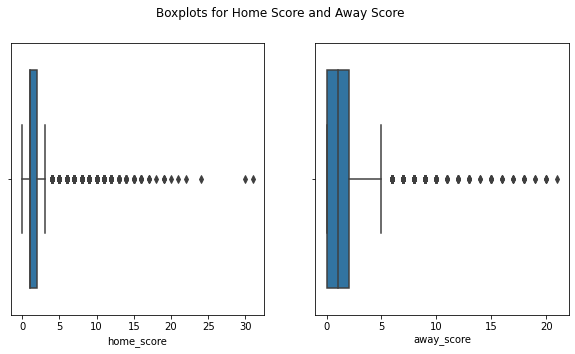

In [15]:
# Checking for Outliers
#
# Using boxplot to check on the outliers in various columns
#
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Boxplots for Home Score and Away Score')
sns.boxplot(results['home_score'], ax=ax1)
sns.boxplot(results['away_score'], ax=ax2)
plt.show()

In [16]:
# Removing outliers using the function
#
results = Remove_Outlier(results,'home_score')
results = Remove_Outlier(results,'away_score')
results = results.reset_index(drop=True)

results.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
2,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
3,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
4,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
5,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
6,1879-01-18,England,Wales,2,1,Friendly,London,England,False
7,1879-04-07,Wales,Scotland,0,3,Friendly,Wrexham,Wales,False
8,1880-03-15,Wales,England,2,3,Friendly,Wrexham,Wales,False
9,1881-02-26,England,Wales,0,1,Friendly,Blackburn,England,False


In [17]:
# Checking the shape
#
results.shape

(34660, 9)

In [18]:
# Identifying the Missing Data
#
results.isnull().sum()


date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

data does not have missing values

In [19]:
# Checking for duplicates
#
results.duplicated().sum()

0

data soes not contain duplicates

In [20]:
# # Converting the 
# Conv_Finance_df=Finance_df.replace({'' : { '' : 1, 'No' : 0}})


In [21]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
2,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
3,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
4,1877-03-03,England,Scotland,1,3,Friendly,London,England,False


In [22]:
# Creating the column 'status'
# showing a win, draw or loss from the home team’s perspective
#
# Creating conditions
conditions = [results['home_score'] > results['away_score'], results['home_score'] < results['away_score']]

# Creating the choices from which 
# win = W
# Loss = L
# Draw = D
#
choices = ['W','L']

# Creating the new column 'status' and adding the string values that correspond to the status of the home team
results['status'] = np.select(conditions, choices, default='D')

# checking the updated dataframe
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,status
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,D
1,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,W
2,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,D
3,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,W
4,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,L


In [23]:
results = results[['date','home_team','away_team','home_score','away_score','tournament','neutral','status']]
results.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,status
0,1872-11-30,Scotland,England,0,0,Friendly,False,D
1,1874-03-07,Scotland,England,2,1,Friendly,False,W
2,1875-03-06,England,Scotland,2,2,Friendly,False,D
3,1876-03-04,Scotland,England,3,0,Friendly,False,W
4,1877-03-03,England,Scotland,1,3,Friendly,False,L


### fifa rankings dataset

In [24]:
# Checking the data types
#
fifa_rankings.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [25]:
# Changing the date column to date time
#
# fifa_rankings.csv
#
fifa_rankings['rank_date'] = pd.to_datetime(fifa_rankings['rank_date'])

In [26]:
# Checking for duplicates
#
fifa_rankings.duplicated().any().sum()

1

In [27]:
fifa_rankings.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [28]:
# Dropping the duplicates
#
# fifa_rankings = fifa_rankings.drop_duplicates(inplace=True)
# fifa_rankings = fifa_rankings.reset_index(drop = True)

In [29]:
# Dropping null values
#
fifa_rankings.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

There are no null values


In [30]:
# getting the columns we will be using
#
fifa_rankings = fifa_rankings[['rank','country_full','rank_date']]
fifa_rankings.head()

,rank,country_full,rank_date
0,1,Germany,1993-08-08
1,2,Italy,1993-08-08
2,3,Switzerland,1993-08-08
3,4,Sweden,1993-08-08
4,5,Argentina,1993-08-08


### Merged Dataset


In [31]:
# Getting the column Year from date
fifa_rankings["Year"] = pd.to_datetime(fifa_rankings['rank_date']).dt.year

# drop the column time
fifa_rankings.drop("rank_date", axis=1, inplace=True)

# convert the column to string
fifa_rankings['Year'] = fifa_rankings['Year'].astype(int)

In [32]:
fifa_rankings.head()

,rank,country_full,Year
0,1,Germany,1993
1,2,Italy,1993
2,3,Switzerland,1993
3,4,Sweden,1993
4,5,Argentina,1993


In [33]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,status
0,1872-11-30,Scotland,England,0,0,Friendly,False,D
1,1874-03-07,Scotland,England,2,1,Friendly,False,W
2,1875-03-06,England,Scotland,2,2,Friendly,False,D
3,1876-03-04,Scotland,England,3,0,Friendly,False,W
4,1877-03-03,England,Scotland,1,3,Friendly,False,L


In [34]:
# Getting the column Year from date
results["Year"] = pd.to_datetime(results['date']).dt.year

# drop the column time
results.drop("date", axis=1, inplace=True)

# convert the column to string
results['Year'] = results['Year'].astype(int)

In [35]:
results.head()

,home_team,away_team,home_score,away_score,tournament,neutral,status,Year
0,Scotland,England,0,0,Friendly,False,D,1872
1,Scotland,England,2,1,Friendly,False,W,1874
2,England,Scotland,2,2,Friendly,False,D,1875
3,Scotland,England,3,0,Friendly,False,W,1876
4,England,Scotland,1,3,Friendly,False,L,1877


In [36]:
fifa_rankings.head()

,rank,country_full,Year
0,1,Germany,1993
1,2,Italy,1993
2,3,Switzerland,1993
3,4,Sweden,1993
4,5,Argentina,1993


In [37]:
# creating copies
#

a = fifa_rankings.copy()
b = results.copy()
c = fifa_rankings.copy()
d = results.copy()

In [38]:
# Renaming the columns so as to merge
#
df = a.rename(columns = {'country_full': 'home_team'}, inplace = False)


In [39]:
# merging
#
process = pd.merge(df,b, how='right', on=['Year','home_team'])
process.tail()

,rank,home_team,Year,away_team,home_score,away_score,tournament,neutral,status
214554,NaN,Papua New Guinea,2019,Fiji,1,1,Pacific Games,True,D
214555,NaN,Samoa,2019,Tonga,2,0,Pacific Games,False,W
214556,NaN,American Samoa,2019,Tuvalu,1,1,Pacific Games,True,D
214557,NaN,New Caledonia,2019,Fiji,1,0,Pacific Games,True,W
214558,NaN,North Korea,2019,Tajikistan,1,0,Intercontinental Cup,True,W


In [40]:
# Renaming the columns so to get unique names
#
process = process.rename(columns = {'rank': 'home_team_rank'}, inplace = False)
process.head()

,home_team_rank,home_team,Year,away_team,home_score,away_score,tournament,neutral,status
0,NaN,Scotland,1872,England,0,0,Friendly,False,D
1,NaN,Scotland,1874,England,2,1,Friendly,False,W
2,NaN,England,1875,Scotland,2,2,Friendly,False,D
3,NaN,Scotland,1876,England,3,0,Friendly,False,W
4,NaN,England,1877,Scotland,1,3,Friendly,False,L


In [41]:
# Checking for nul values
process.isnull().sum()

home_team_rank    16906
home_team             0
Year                  0
away_team             0
home_score            0
away_score            0
tournament            0
neutral               0
status                0
dtype: int64

In [42]:
# Renaming the columns so as to merge
#
df_2= c.rename(columns = {'country_full': 'away_team'}, inplace = False)
df_2.head()


,rank,away_team,Year
0,1,Germany,1993
1,2,Italy,1993
2,3,Switzerland,1993
3,4,Sweden,1993
4,5,Argentina,1993


In [43]:
# merging
#
process_2 = pd.merge(process,df_2, how='right',on=['Year','away_team'])
process_2.shape

(2077698, 10)

In [44]:
# Renaming columns
#
process_2 = process_2.rename(columns = {'rank': 'away_team_rank'}, inplace = False)

In [45]:
# Dropping null values
#
process_2 = process_2.dropna()
process_2.shape


(2047746, 10)

In [46]:
# checking the data
process_2.head()

,home_team_rank,home_team,Year,away_team,home_score,away_score,tournament,neutral,status,away_team_rank
0,31.0,Tunisia,1993,Germany,1.0,1.0,Friendly,False,D,1
1,34.0,Tunisia,1993,Germany,1.0,1.0,Friendly,False,D,1
2,35.0,Tunisia,1993,Germany,1.0,1.0,Friendly,False,D,1
3,36.0,Tunisia,1993,Germany,1.0,1.0,Friendly,False,D,1
4,32.0,Tunisia,1993,Germany,1.0,1.0,Friendly,False,D,1


In [47]:
# dropping duplicates
result_ranking = process_2.drop_duplicates()

In [48]:
result_ranking = result_ranking[['home_team','home_score','away_team','away_score','Year','home_team_rank','away_team_rank','tournament','neutral','status']]
result_ranking.sample(10)

,home_team,home_score,away_team,away_score,Year,home_team_rank,away_team_rank,tournament,neutral,status
1537116,Tunisia,3.0,Sudan,0.0,2012,43.0,105,Friendly,True,W
235278,Nigeria,1.0,Bulgaria,0.0,1998,69.0,47,FIFA World Cup,True,W
1331427,Montenegro,2.0,Azerbaijan,0.0,2010,64.0,91,Friendly,False,W
1382628,Nigeria,0.0,Botswana,0.0,2011,32.0,74,Friendly,False,D
1041002,Barbados,0.0,Guatemala,0.0,2007,128.0,81,Friendly,False,D
1398711,Iraq,1.0,China PR,0.0,2011,88.0,77,FIFA World Cup qualification,True,W
1579305,Portugal,1.0,Sweden,0.0,2013,5.0,24,FIFA World Cup qualification,False,W
1712596,Paraguay,0.0,United Arab Emirates,0.0,2014,75.0,65,Friendly,True,D
1305655,Thailand,1.0,Poland,3.0,2010,106.0,59,King's Cup,False,L
417295,Malta,2.0,Qatar,0.0,2000,118.0,86,Friendly,False,W


In [49]:
# Checking the shape.
result_ranking.shape

(925136, 10)

### Feature Engineering

In [50]:
# Feature Engineering for the neutral column.
#
result_ranking['neutral'] = pd.get_dummies(result_ranking['neutral'],drop_first=True)



In [51]:
result_ranking.head()

,home_team,home_score,away_team,away_score,Year,home_team_rank,away_team_rank,tournament,neutral,status
0,Tunisia,1.0,Germany,1.0,1993,31.0,1,Friendly,0,D
1,Tunisia,1.0,Germany,1.0,1993,34.0,1,Friendly,0,D
2,Tunisia,1.0,Germany,1.0,1993,35.0,1,Friendly,0,D
3,Tunisia,1.0,Germany,1.0,1993,36.0,1,Friendly,0,D
4,Tunisia,1.0,Germany,1.0,1993,32.0,1,Friendly,0,D


In [52]:
# Feature  engineering for the status column.
#
Status = pd.get_dummies(result_ranking['status'],drop_first = True)
Status

,L,W
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2077677,1,0
2077679,1,0
2077680,0,1
2077682,0,1


In [53]:
# tou = result_ranking['tournament'].groupby(result_ranking['tournament'])
# tou = pd.DataFrame(tou)
# tou

In [54]:
#result_ranking['tournament'] = result_ranking["tournament"].replace({['']: "Others"}, inplace=True)

In [55]:
# Dropping the columns that won't be used in regression
#
result_ranking.drop(['status','tournament'],axis=1,inplace=True)
result_ranking.head()

,home_team,home_score,away_team,away_score,Year,home_team_rank,away_team_rank,neutral
0,Tunisia,1.0,Germany,1.0,1993,31.0,1,0
1,Tunisia,1.0,Germany,1.0,1993,34.0,1,0
2,Tunisia,1.0,Germany,1.0,1993,35.0,1,0
3,Tunisia,1.0,Germany,1.0,1993,36.0,1,0
4,Tunisia,1.0,Germany,1.0,1993,32.0,1,0


In [56]:
# Concatinating the new numerical status and the rest of the data
#
fifa_data = pd.concat([result_ranking, Status], axis=1)


In [57]:
# Checking the data
fifa_data.head()

,home_team,home_score,away_team,away_score,Year,home_team_rank,away_team_rank,neutral,L,W
0,Tunisia,1.0,Germany,1.0,1993,31.0,1,0,0,0
1,Tunisia,1.0,Germany,1.0,1993,34.0,1,0,0,0
2,Tunisia,1.0,Germany,1.0,1993,35.0,1,0,0,0
3,Tunisia,1.0,Germany,1.0,1993,36.0,1,0,0,0
4,Tunisia,1.0,Germany,1.0,1993,32.0,1,0,0,0


## 6. Exploratory Analysis

### Univariate Analysis

Ploting the univariate summaries and recording our observations

In [58]:
# Getting a general descriptive statistics of the data
#
results.describe()

,home_score,away_score,Year
count,34660.000000,34660.000000,34660.000000
mean,1.260964,1.084103,1991.255136
std,1.002328,1.081810,22.951717
min,0.000000,0.000000,1872.000000
25%,0.000000,0.000000,1980.000000
50%,1.000000,1.000000,1997.000000
75%,2.000000,2.000000,2009.000000
max,3.000000,4.000000,2019.000000


In [59]:
# getting the modal scores for home and away teams
#
# Home Team
#
print(results['home_score'].mode())
print(results['away_score'].mode())

0    1
dtype: int64
0    0
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Matches Played On Neutral Grounds Vs those played On Home Grounds')

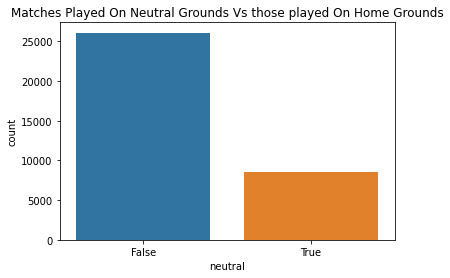

In [60]:
# plotting on the venue of the matches played either on neutral grounds or on home grounds
#

sns.countplot(results['neutral'],order=results['neutral'].value_counts().index)
plt.title('Matches Played On Neutral Grounds Vs those played On Home Grounds')

Generally we can see that after removing all the outliers we can see that:
*  The **mean goals** scored for the *home team is 1.26096* and for the *away team is 1.084103*.
*  The most goals scored for *an away team is 4* and for *a home team is 3* 
*  Most matches are not played on neutral grounds.

## 7. Implementing the Solution

In [61]:
# checking my dataset
# 
results.head()

,home_team,away_team,home_score,away_score,tournament,neutral,status,Year
0,Scotland,England,0,0,Friendly,False,D,1872
1,Scotland,England,2,1,Friendly,False,W,1874
2,England,Scotland,2,2,Friendly,False,D,1875
3,Scotland,England,3,0,Friendly,False,W,1876
4,England,Scotland,1,3,Friendly,False,L,1877


### a. Polynomial Regression

Checking for independence between features

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X= fifa_data.drop(['home_team', 'away_team'],axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


         features  vif_Factor
0      home_score    7.687771
1      away_score    6.162251
2            Year    9.366561
3  home_team_rank    6.018889
4  away_team_rank    6.011058
5         neutral    1.327016
6               L    3.990703
7               W    5.376368


In [73]:
from sklearn.linear_model import LinearRegression


X = fifa_data[['home_team_rank','away_team_rank']].values
y = fifa_data['home_score'].values



# Splitting the data to train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)




# fitting the polynomial regression

poly_reg = PolynomialFeatures(degree = 3) 
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
# predicting using polynomial method
poly_pred = pol_reg.predict(poly_reg.fit_transform(X))
print(poly_pred)

[0.90537752 0.88331003 0.87615433 ... 1.51351129 1.52341795 1.53319559]


In [75]:
# Checking if the model is correct
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, poly_pred)))

Root Mean Squared Error: 0.9354691390615834


In [77]:
#Visualize the Polynomial Regression results
# plt.scatter(X, y, color='blue') 
# plt.plot(X, pol_reg.predict(X_poly), color='red')
# plt.title('Fifa Mens Scores Prediction')
# plt.xlabel('X')
# plt.ylabel('Home Scores')
# plt.show()



### b. Logistic Regression

In [ ]:
X = fifa_data[['home_team_rank','away_team_rank','neutral','home_score','away_score','neutral']].values
y = fifa_data['L','W'].values

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?